### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Uploading the File

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


### Read the CSV File

In [6]:
df=pd.read_csv('Housing.csv')

### Explore the data

In [9]:
print("First 5 rows of the data:")
print(df.head())
print("\nSummary statistics of the data:")
print(df.describe())
print("\nData types of the columns:")
print(df.dtypes)
print("Missing Values: ")
print(df.isnull().sum())

First 5 rows of the data:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Summary statistics of the data:
              price          area    bed

### Selecting Features And Targeting

In [10]:
x=df[['bedrooms','area']]
y=df['price']

### Splitting into training and testing sets

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

### Train the Model

In [17]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(x_test)

### Evaluation

In [20]:
print("\nMean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test,y_pred))


Mean Squared Error:  2822373889030.164
R2 Score:  0.3437878438295844


### Visualization for better understanding

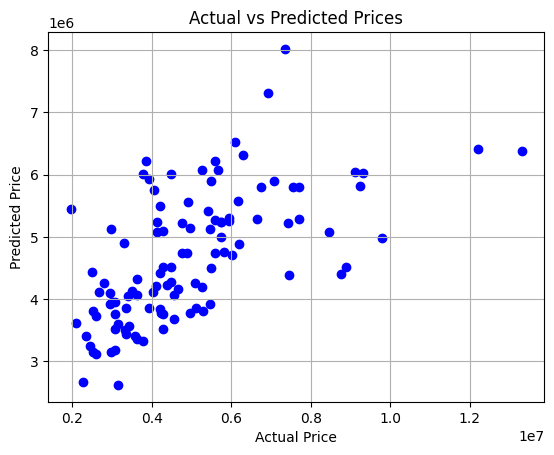

In [27]:
plt.scatter(y_test,y_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()


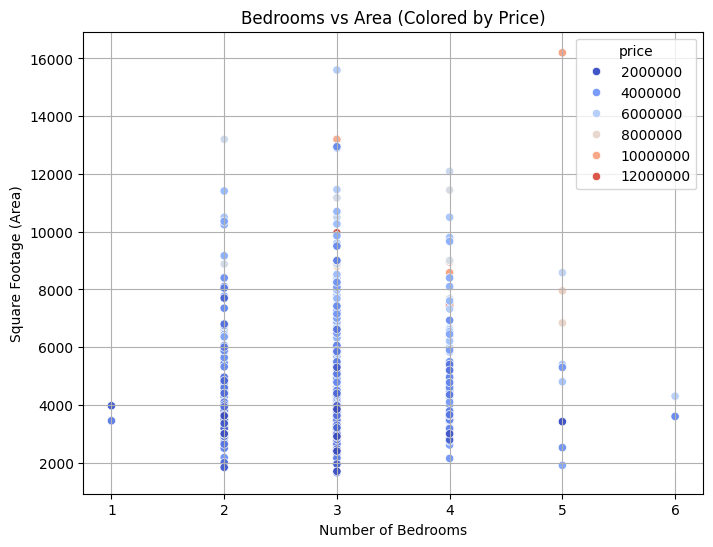

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bedrooms', y='area', hue='price', palette='coolwarm')
plt.title('Bedrooms vs Area (Colored by Price)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Square Footage (Area)')
plt.grid()
plt.show()

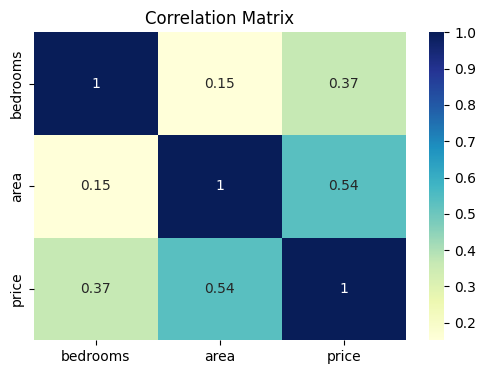

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['bedrooms', 'area', 'price']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()
